In [16]:
import matplotlib.pyplot as plt
import numpy as np

import torch
import torch.nn as nn

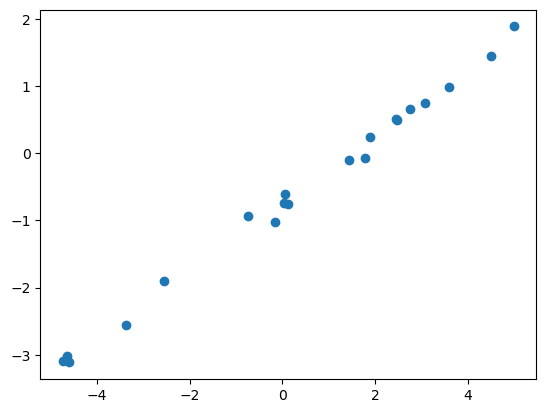

In [17]:

# Generate 20 data points
N = 20
# Random data on x-axis
X = np.random.rand(N) * 10 - 5
Y = 0.5 * X - 1 + 0.5*np.random.rand(N)


plt.scatter(X,Y)

In [18]:

# Create the linear regression model
model = nn.Linear(1, 1)
# Loss and optimizer
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.05)

In [19]:
# In ML we want our data to be of shape:
# (num_samples x num_dimensions)
X = X.reshape(N, 1)
Y = Y.reshape(N, 1)

# PyTorch uses float32 by default
# Numpy creates float64 by default
inputs = torch.from_numpy(X.astype(np.float32))
targets = torch.from_numpy(Y.astype(np.float32))

In [20]:
# Train the model
n_epochs = 30
losses = []
for it in range(n_epochs):
  # zero the parameter gradients
  optimizer.zero_grad()

  # Forward pass
  outputs = model(inputs)
  loss = criterion(outputs, targets)

  # keep the loss so we can plot it later
  losses.append(loss.item())
    
  # Backward and optimize
  loss.backward()
  optimizer.step()
    
  print(f'Epoch {it+1}/{n_epochs}, Loss: {loss.item():.4f}')

Epoch 1/30, Loss: 10.6853
Epoch 2/30, Loss: 0.9796
Epoch 3/30, Loss: 0.7215
Epoch 4/30, Loss: 0.5884
Epoch 5/30, Loss: 0.4808
Epoch 6/30, Loss: 0.3933
Epoch 7/30, Loss: 0.3221
Epoch 8/30, Loss: 0.2641
Epoch 9/30, Loss: 0.2170
Epoch 10/30, Loss: 0.1786
Epoch 11/30, Loss: 0.1473
Epoch 12/30, Loss: 0.1219
Epoch 13/30, Loss: 0.1012
Epoch 14/30, Loss: 0.0843
Epoch 15/30, Loss: 0.0706
Epoch 16/30, Loss: 0.0595
Epoch 17/30, Loss: 0.0504
Epoch 18/30, Loss: 0.0430
Epoch 19/30, Loss: 0.0370
Epoch 20/30, Loss: 0.0321
Epoch 21/30, Loss: 0.0281
Epoch 22/30, Loss: 0.0248
Epoch 23/30, Loss: 0.0222
Epoch 24/30, Loss: 0.0201
Epoch 25/30, Loss: 0.0183
Epoch 26/30, Loss: 0.0169
Epoch 27/30, Loss: 0.0157
Epoch 28/30, Loss: 0.0148
Epoch 29/30, Loss: 0.0140
Epoch 30/30, Loss: 0.0134


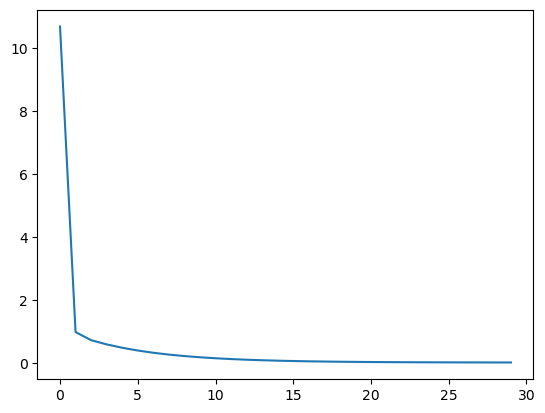

In [21]:
# Plot the loss per iteration
plt.plot(losses);

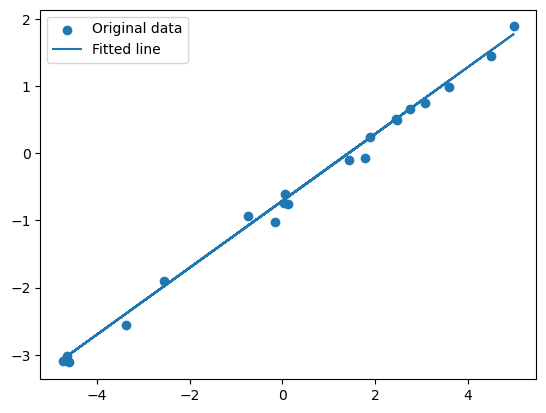

In [22]:
# Plot the graph
predicted = model(inputs).detach().numpy()
plt.scatter(X, Y, label='Original data')
plt.plot(X, predicted, label='Fitted line')
plt.legend()
plt.show()

In [23]:
# Important!
# In order to test the efficacy of our model, synthetic data is useful
# Why?
# Because ***we know the answer***
# True values of (w, b) are (0.5, -1)
m = model.weight.data.numpy()
b = model.bias.data.numpy()
print(m, b)

[[0.49737796]] [-0.708588]
